In [70]:
import numpy as np
from mindspore import context
from mindspore import nn

from mindspore.train import Model
from mindspore.train.callback import LossMonitor
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from util.mindspore_model import LeNetMindspore
from util.mindspore_func import get_data

In [ ]:
context.set_context(mode=context.GRAPH_MODE, device_target='CPU')
net = LeNetMindspore()
optimizer = nn.Adam(net.trainable_params(), learning_rate=0.01)
criterion = nn.loss.CrossEntropyLoss()
model = Model(net, loss_fn=criterion, optimizer=optimizer, metrics={'acc'})

In [ ]:
train_dataset, val_dataset = get_data(batch_size=128)

In [79]:
lossMonitor = LossMonitor(100)
num_epoch = 100
epoch_losses, train_scores, val_scores = [], [], []
for epoch in tqdm(range(num_epoch)):
    model.train(1, train_dataset, callbacks=[lossMonitor], dataset_sink_mode=False)
    train_score = model.eval(train_dataset)
    train_scores.append(train_score['acc'])
    val_score = model.eval(val_dataset)
    val_scores.append(val_score['acc'])
    epoch_losses.append(np.mean(lossMonitor.losses))

100%|██████████| 100/100 [00:24<00:00,  4.12it/s]


In [80]:
resultData = pd.DataFrame({'epoch_loss': epoch_losses, 'train_score': train_scores, 'test_score': val_scores})
resultData.to_csv(f'./results/{type(net).__name__}-result.csv', index=False)

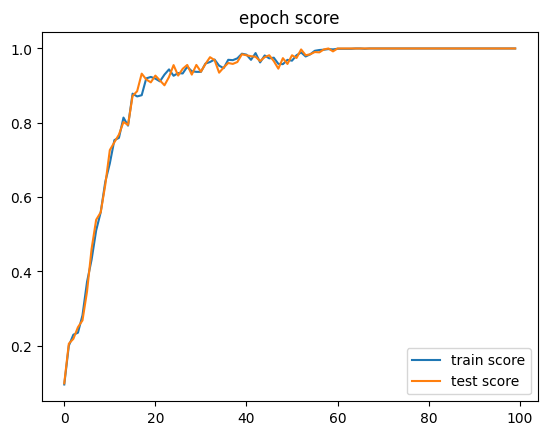

In [81]:
# 训练精度
plt.plot(train_scores, label='train score')
plt.plot(val_scores, label='test score')
plt.title('epoch score')
plt.legend()
plt.savefig(f'./results/{type(net).__name__}-epoch_score.png')
plt.show()

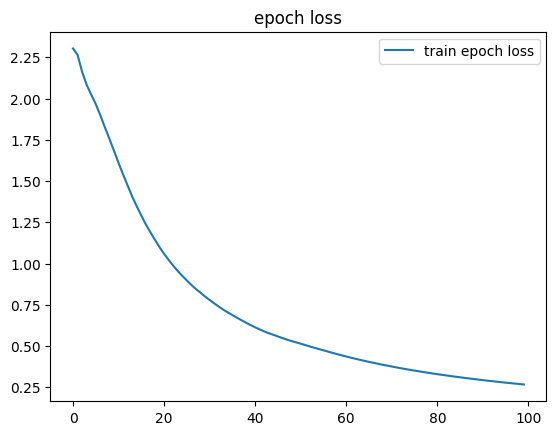

In [82]:
# 训练损失
plt.plot(epoch_losses)
plt.title('epoch loss')
plt.legend(['train epoch loss'])
plt.savefig(f'./results/{type(net).__name__}-epoch_loss.png')
plt.show()